# Breast Cancer Prediction - Logistic regression

### Importing necessary modules

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [262]:
dataset = pd.read_csv("data.csv")

train_data = dataset.sample(frac=0.8, random_state = 0)
test_data = dataset.drop(train_data.index)

train_data.pop("id")
train_data.pop("Unnamed: 32")
test_data.pop("id")
test_data.pop("Unnamed: 32")

train_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


## Visualizations of the training dataset to help choose feature columns

Number of Beningn: 287
Number of Malignant: 168


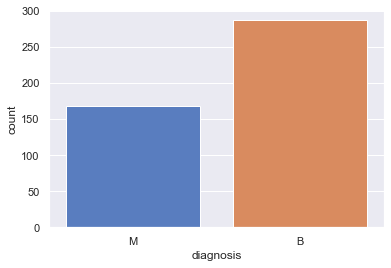

In [263]:
ax = sns.countplot(x=train_data.diagnosis)
B, M = train_data.diagnosis.value_counts()
print(f"Number of Beningn: {B}")
print(f"Number of Malignant: {M}")

In [264]:
train_stats = train_data.describe().transpose()
test_stats = test_data.describe().transpose()

train_data_labels = train_data.pop("diagnosis")
test_data_labels = test_data.pop("diagnosis")

train_stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.038009,3.443339,6.981000,11.665000,13.270000,15.815000,28.11000
texture_mean,455.0,19.254352,4.356593,9.710000,16.175000,18.800000,21.635000,39.28000
perimeter_mean,455.0,91.345407,23.756012,43.790000,75.015000,85.790000,104.200000,188.50000
area_mean,455.0,645.170549,336.691085,143.500000,417.450000,541.800000,785.600000,2499.00000
smoothness_mean,455.0,0.096414,0.014029,0.065760,0.085925,0.095920,0.105200,0.16340
compactness_mean,455.0,0.103311,0.052823,0.026500,0.062985,0.089630,0.130400,0.34540
concavity_mean,455.0,0.087379,0.080251,0.000000,0.028360,0.058350,0.126950,0.42680
concave points_mean,455.0,0.048025,0.038383,0.000000,0.019685,0.032640,0.068670,0.20120
symmetry_mean,455.0,0.181355,0.027769,0.106000,0.162000,0.179100,0.195650,0.30400
fractal_dimension_mean,455.0,0.062909,0.007203,0.050240,0.057685,0.061320,0.066290,0.09744


### Standarization of the data (Z-score)

In [265]:
train_data_stand = (train_data - train_stats["mean"])/train_stats["std"]
test_data_stand = (test_data - test_stats["mean"])/test_stats["std"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

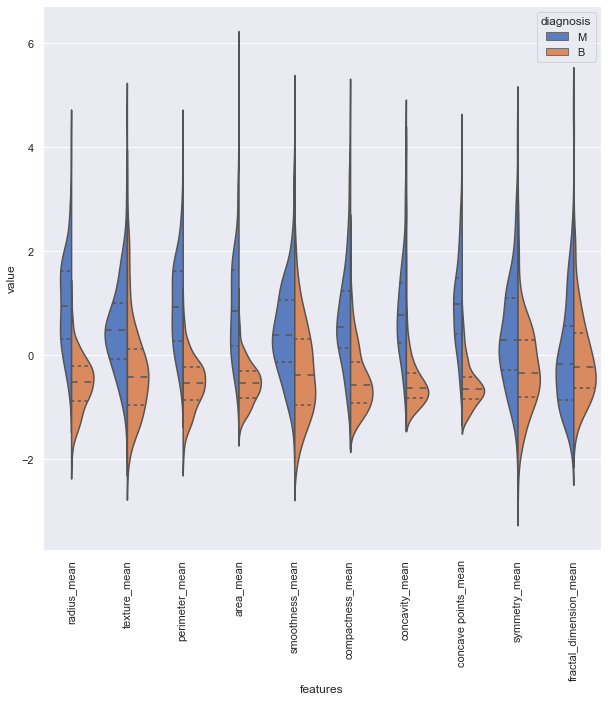

In [266]:
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:,:10]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=diagram_data, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

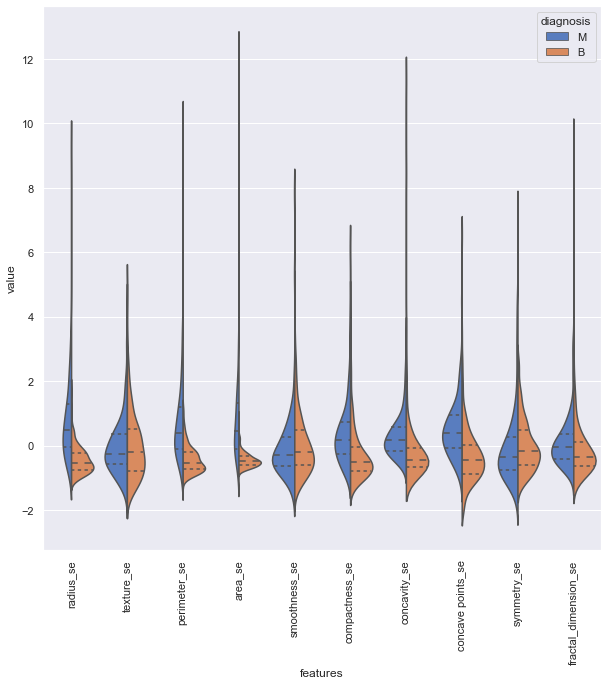

In [267]:
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:, 10:20]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=diagram_data, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

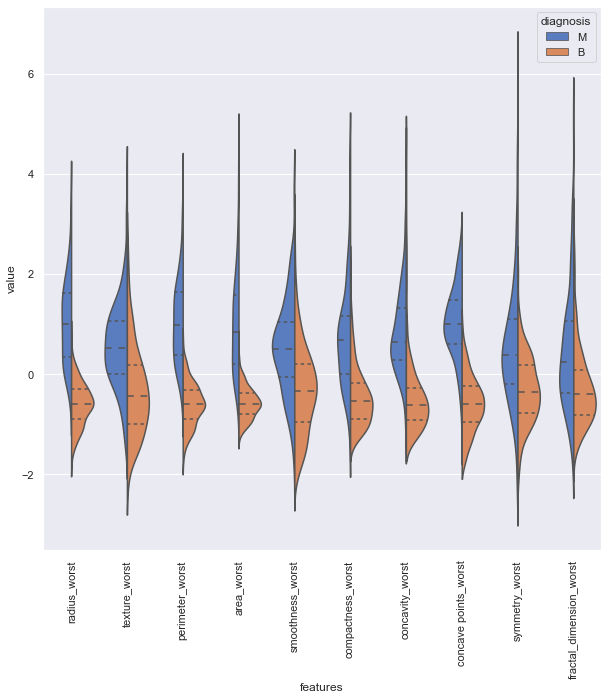

In [268]:
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:,20:]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=diagram_data, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

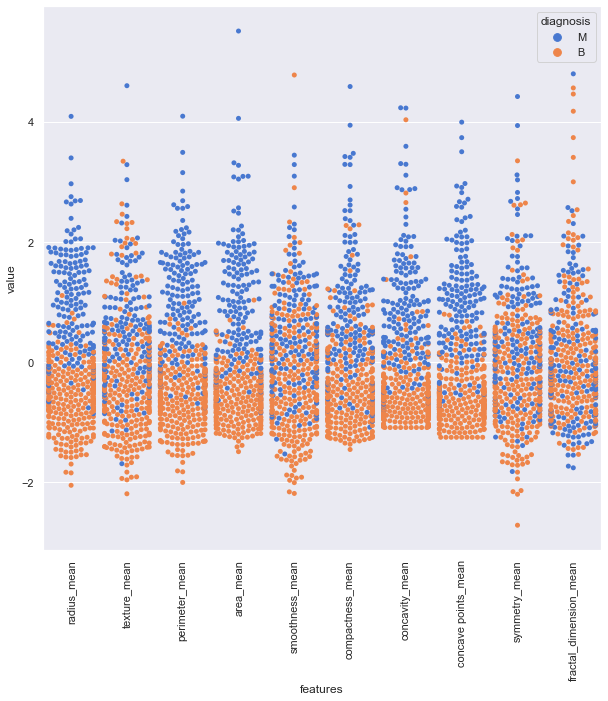

In [269]:
sns.set(palette="muted")
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:,:10]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=diagram_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

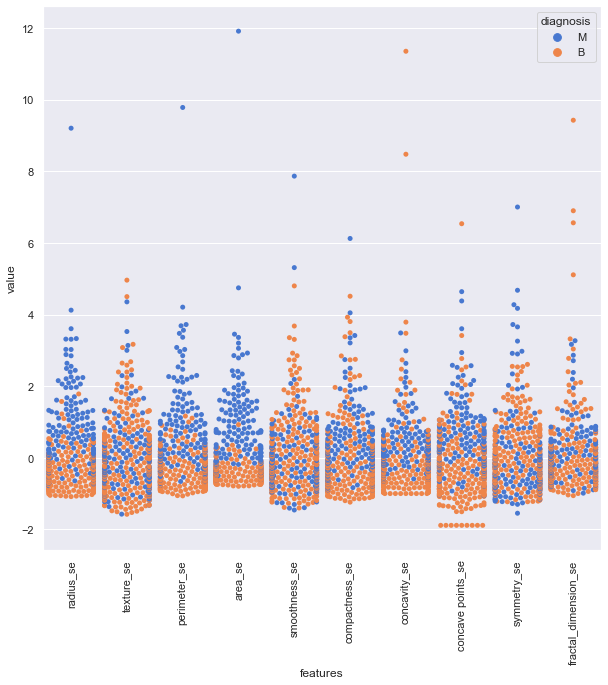

In [270]:
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:,10:20]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=diagram_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

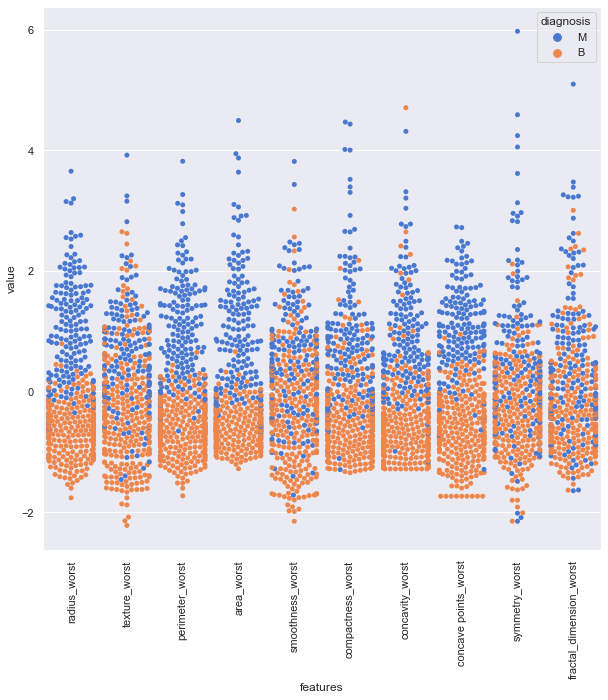

In [271]:
diagram_data = pd.concat([train_data_labels, train_data_stand.iloc[:,20:30]], axis = 1)
diagram_data = pd.melt(diagram_data, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=diagram_data)
plt.xticks(rotation=90)

<AxesSubplot:>

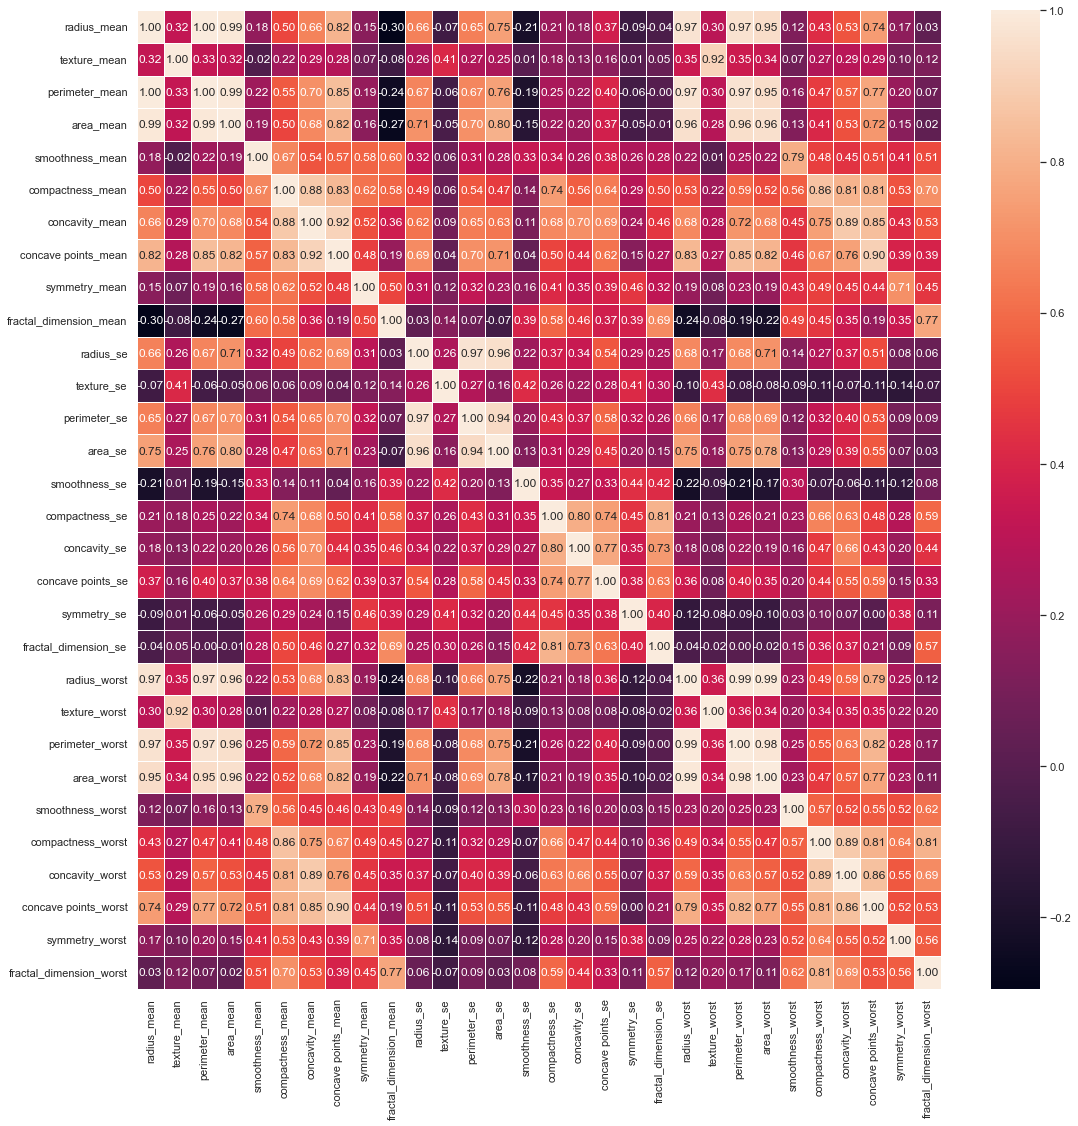

In [272]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)

### Dropping correlated columns

In [273]:
drop_correlated = ["perimeter_mean", "radius_mean", "compactness_mean", "concave points_mean", "perimeter_se", "radius_se", "perimeter_worst", "radius_worst", "compactness_worst", "concave points_worst", "compactness_se", "concave points_se", "texture_worst", "area_worst"]
train_data_selected = train_data.drop(drop_correlated, axis = 1)

<AxesSubplot:>

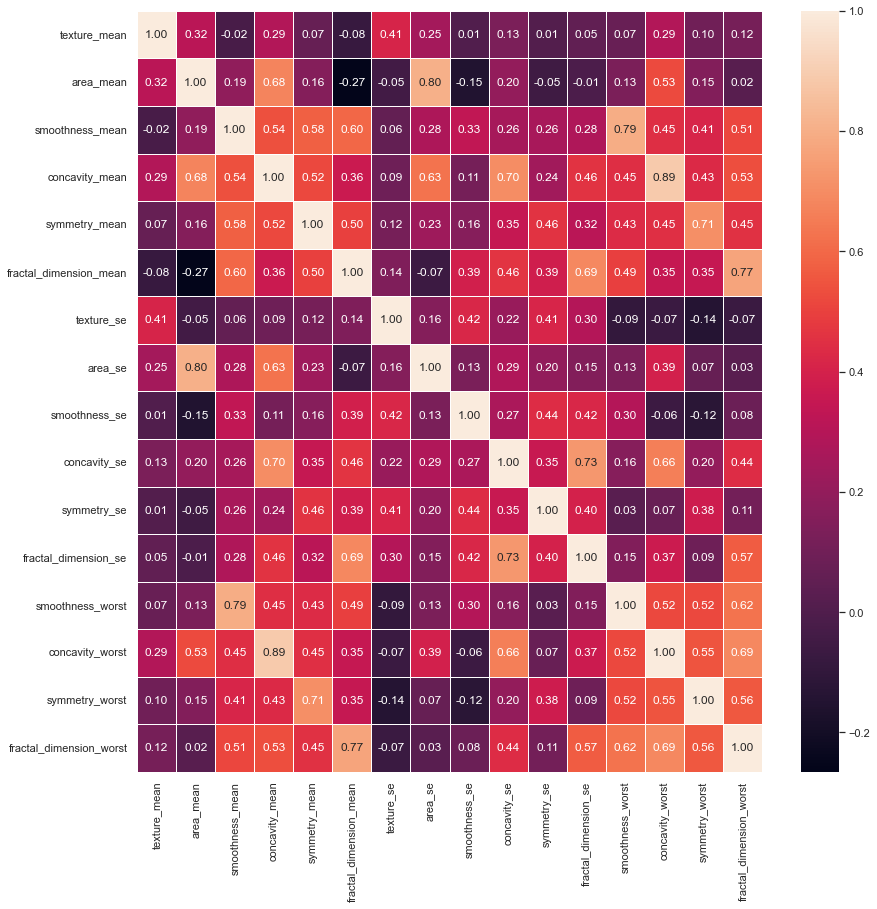

In [274]:
f, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(train_data_selected.corr(), annot=True, linewidths=.5, fmt=".2f", ax = ax)

### Function for creating the model

In [275]:
def create_model(my_learning_rate, feature_layer, my_metrics):
    model = tf.keras.models.Sequential()

    model.add(feature_layer)

    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)
 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model

### Function for training the model

In [276]:
def train_model(model, dataset, epochs, label_name, batch_size=None, shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name)) 
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
    epochs = history.epoch

    hist = pd.DataFrame(history.history)

    return epochs, hist

### Function for plotting how various classification metrics change with each epoch

In [277]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

### Preparing the data for the training

In [278]:
train_data_stand["diagnosis_evaluated"] = (train_data_labels == "M").astype(float)
test_data_stand["diagnosis_evaluated"] = (test_data_labels == "M").astype(float)

### Selection of the best 5 features for the model based on the analysis of visualizations

In [279]:
feature_names = ["area_mean", "concavity_mean", "area_se", "concavity_worst", "texture_mean"]
feature_columns = []

for feature in feature_names:
    feature_columns.append(tf.feature_column.numeric_column(feature))

feature_layer = layers.DenseFeatures(feature_columns)
feature_layer(dict(train_data_stand))

<tf.Tensor: shape=(455, 5), dtype=float32, numpy=
array([[-0.26276475, -0.13675138,  0.7117766 ,  1.1572968 ,  0.2905133 ],
       [-0.3186023 , -0.53092265, -0.7434022 , -0.6211852 ,  1.3762239 ],
       [-0.11485469, -0.49001116, -0.828759  , -0.9868365 , -0.8250372 ],
       ...,
       [-0.03614752, -0.35135302,  0.5547698 ,  1.1955849 ,  0.56595784],
       [-0.49829224, -0.117888  ,  0.26318577,  0.8313694 ,  1.7457788 ],
       [-0.35038215, -0.1541449 , -1.0801942 , -1.2776107 ,  0.01277336]],
      dtype=float32)>

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
23/23 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7033 - precision: 0.5882 - recall: 0.6548 - auc: 0.7342
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5096 - accuracy: 0.8044 - precision: 0.7365 - recall: 0.7321 - auc: 0.8481
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8440 - precision: 0.8050 - recall: 0.7619 - auc: 0.9007
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8791 - precision: 0.8645 - recall: 0.7976 - auc: 0.9262
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8923 - precision: 0.8790 - recall: 0.8214 - auc: 0.9435
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.9033 - precision: 0.8924 - recall: 0.8393 - au

23/23 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9319 - precision: 0.9363 - recall: 0.8750 - auc: 0.9823
Epoch 22/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9341 - precision: 0.9367 - recall: 0.8810 - auc: 0.9828
Epoch 23/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9319 - precision: 0.9363 - recall: 0.8750 - auc: 0.9832
Epoch 24/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9319 - precision: 0.9363 - recall: 0.8750 - auc: 0.9835
Epoch 25/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9363 - precision: 0.9371 - recall: 0.8869 - auc: 0.9833
Epoch 26/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9363 - precision: 0.9371 - recall: 0.8869 - auc: 0.9832
Epoch 27/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1672 - accuracy: 0.9363 - preci

23/23 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9451 - precision: 0.9333 - recall: 0.9167 - auc: 0.9843
Epoch 76/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.9429 - precision: 0.9277 - recall: 0.9167 - auc: 0.9843
Epoch 77/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9451 - precision: 0.9281 - recall: 0.9226 - auc: 0.9842
Epoch 78/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.9429 - precision: 0.9277 - recall: 0.9167 - auc: 0.9841
Epoch 79/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9429 - precision: 0.9277 - recall: 0.9167 - auc: 0.9843
Epoch 80/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9429 - precision: 0.9277 - recall: 0.9167 - auc: 0.9842
Epoch 81/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9407 - preci

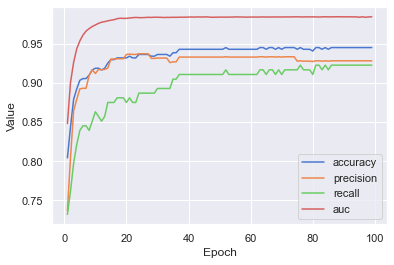

In [280]:
learning_rate = 0.005
epochs = 100
batch_size = 20
label_name = "diagnosis_evaluated"
classification_threshold = 0.5

METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold),
           tf.keras.metrics.Precision(thresholds=classification_threshold, name='precision'),
           tf.keras.metrics.Recall(thresholds=classification_threshold, name="recall"),
           tf.keras.metrics.AUC(num_thresholds=100, name='auc')]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_data_stand, epochs, label_name, batch_size)

list_of_metrics_to_plot = ['accuracy', 'precision', 'recall', 'auc']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [281]:
features = {name: np.array(value) for name, value in test_data_stand.items()}
label = np.array(features.pop(label_name))
my_model.evaluate(x = features, y = label, batch_size = batch_size)

Consider rewriting this model with the Functional API.
6/6 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9649 - precision: 1.0000 - recall: 0.9091 - auc: 0.9935


[0.1125027984380722,
 0.9649122953414917,
 1.0,
 0.9090909361839294,
 0.9935064911842346]